### Week 8 - High Frequency Words

### Shamecca Marshall

### Project Overview
Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

### 1. Choosing a corpus of interest.
I selected one of the corpus from the freely available Gutenburg library that can be downloaded from the NLTK package. Our corpus is Emma written by Jane Austen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /Users/MECCA/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
austen = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

### 2. Total Unique Words.
How many total unique words are in the corpus? 

I can count all 'words' by taking the lenth of our corpus...  

In [6]:
AW=len(austen)
AW

192427

However, this tally includes every word, even duplicates. We can eliminate duplicates by encapsulating our corpus within the Python set function. Let's proceed with that approach and then arrange the outcomes in ascending order to examine the results.

In [7]:
print(*sorted(set(austen))[:100], sep = "   ")

!   !"   !"--   !'   !'--   !)--   !--   !--"   !--(   !--`   "   "'   "--   "`   &   '   '--   ';   (   )   ),   )--   ).   ).--   );--   ,   ,"   ,"--   ,'   ,'"   ,)   ,--   ,--"   -   --   --"   --(   --,   ----   ----------,   --------.'   --.   --."   --.'   --:   --`   .   ."   ."--   .'   .'"   .'--   .'--`   .)   .,   .,"   .,'   .--   .--"   .--`   .]   000   10   1816   23rd   24th   26th   28th   7th   8th   :   :"   :"--   :'   :'--   :--   :--"   ;   ;"   ;"--   ;'   ;'--   ;--   ;--"   ?   ?"   ?"--   ?"--"   ?'   ?'"   ?)--   ?--   ?--"   ?--(   A   Abbey   Abbots   Abdy   Abominable   About


The initial nearly 100 entries comprise non-word elements.

'Unique' Words
Upon reviewing the provided word sample, it becomes apparent that it encompasses punctuation marks, numbers, and words. Additionally, considering that Python distinguishes between uppercase and lowercase letters, it becomes imperative to convert all words to lowercase and eliminate punctuation and numbers to obtain solely the unique words.

We have adapted code from the textbook to exclude punctuation and numbers while also converting all letters to lowercase.

In [8]:
# create list of all words including duplicates, but excluding punctuation, numbers and capitalization
AWwoNP = [word.lower() for word in austen if word.isalpha()]

# print
print(*AWwoNP[:100], sep = "   ")

emma   by   jane   austen   volume   i   chapter   i   emma   woodhouse   handsome   clever   and   rich   with   a   comfortable   home   and   happy   disposition   seemed   to   unite   some   of   the   best   blessings   of   existence   and   had   lived   nearly   twenty   one   years   in   the   world   with   very   little   to   distress   or   vex   her   she   was   the   youngest   of   the   two   daughters   of   a   most   affectionate   indulgent   father   and   had   in   consequence   of   her   sister   s   marriage   been   mistress   of   his   house   from   a   very   early   period   her   mother   had   died   too   long   ago   for   her   to   have   more   than   an   indistinct   remembrance   of   her


In [9]:
# take the length of the set of those words to find the number of unique words
len(set(AWwoNP))

7079

By taking the length of the set of words after we removed punctuation, numbers and capitalization we find that we have 7,079 'unique' words in our corpus.

### 3. How many unique words represent half of all words.

How many distinct words, derived from the most frequently occurring ones, are required to account for half of the total words in the corpus? To achieve this, we generate a frequency distribution of all words, excluding numerals, punctuation, and capitalization. Subsequently, we devise a function to iteratively accumulate the frequency counts of the most prevalent words, ordered from highest to lowest frequency, until their cumulative count reaches or exceeds half of the total word count in the corpus. Simultaneously, we keep track of the number of word frequencies combined to ascertain the quantity of words representing half of the total words.

In [10]:
fdist = nltk.FreqDist(AWwoNP)
fdist

FreqDist({'to': 5239, 'the': 5201, 'and': 4896, 'of': 4291, 'i': 3178, 'a': 3129, 'it': 2528, 'her': 2469, 'was': 2398, 'she': 2340, ...})

In [11]:
tw=len(AWwoNP)
tcount=0
wcount=0
for word, count in fdist.most_common():
    tcount=tcount+count
    wcount=wcount+1
    if tcount>(tw/2):
        print(wcount)
        break

56


The following 56 unique words represent half of the total words in the corpus.

In [13]:

print(*[w for w,n in fdist.most_common()[:56]], sep = ", ")

to, the, and, of, i, a, it, her, was, she, in, not, you, be, that, he, had, but, as, for, have, is, with, very, mr, his, at, so, s, emma, all, could, would, been, him, no, my, mrs, on, any, do, were, miss, me, by, will, must, which, there, from, they, what, this, harriet, or, such


We can double check this by plotting a cumulative frequency plot for the first 56 words and comparing the cumulative count to half the total word count tw.

In [15]:
tw/2

80800.0

The cumulative word count for the first 56 words in the plot below matches pretty well to the expected value of 80,800.

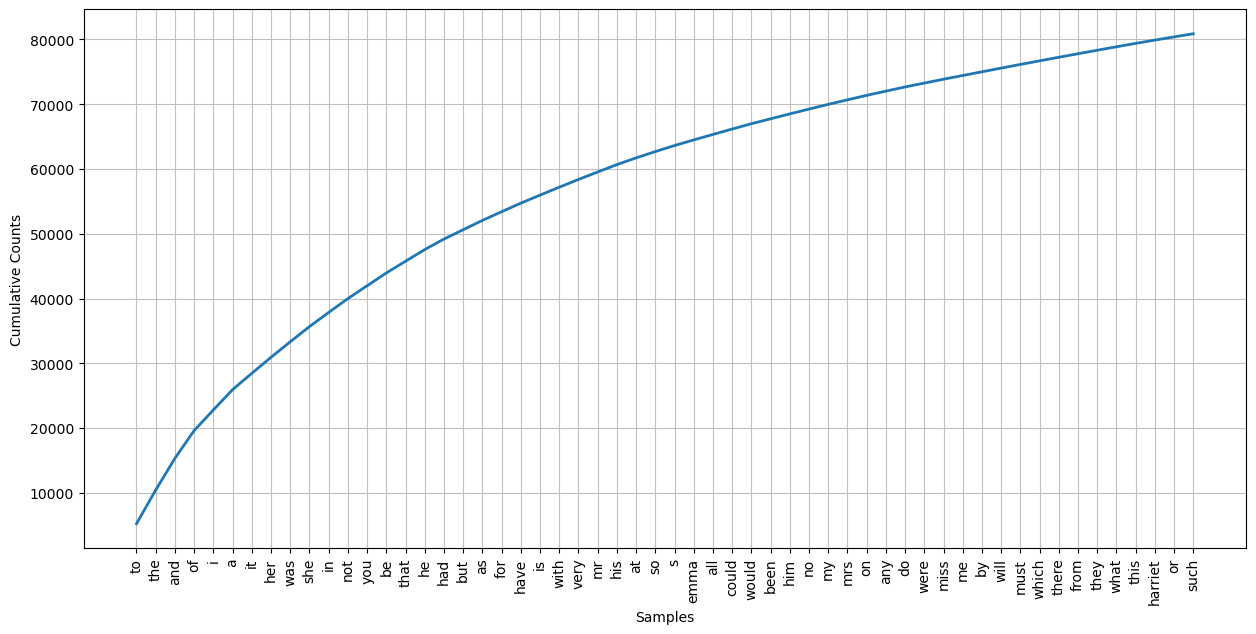

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [16]:
plt.figure(figsize=(15,7))
fdist.plot(56, cumulative = True)

#### 4. The 200 most frequent words.

Identify the 200 highest frequency words in this corpus

In [17]:
wlist = []
for i in range(0, 200, 25):
    df = pd.DataFrame(fdist.most_common()[i:(i+25)])
    df.columns=['word', 'count']
    wlist.append(df)

pd.concat(wlist, axis=1)

,word,count,word,count,word,count,word,count,word,count,word,count,word,count,word,count
0,to,5239,his,1145,they,540,your,364,too,254,made,199,long,146,its,122
1,the,5201,at,1031,what,536,when,363,before,250,body,193,rather,146,look,121
2,and,4896,so,974,this,526,little,359,has,250,ever,193,himself,146,going,120
3,of,4291,s,935,harriet,506,being,358,about,249,oh,193,us,145,heard,120
4,i,3178,emma,865,or,494,never,358,most,248,day,192,hope,143,moment,120
5,a,3129,all,845,such,489,good,358,dear,241,young,192,done,142,came,119
6,it,2528,could,837,much,486,did,352,fairfax,241,up,190,cannot,142,last,119
7,her,2469,would,820,if,485,we,349,always,238,two,178,seemed,141,take,119
8,was,2398,been,759,said,484,only,341,man,235,friend,177,over,139,half,118
9,she,2340,him,759,more,467,know,337,thought,226,though,177,away,138,love,117


### 5. Relative frequency of these 200 words.

Create a graph that shows the relative frequency of these 200 words.

Unfortunately, the default NLTK plot for frequency distributions does not actually plot the relative frequency but plots the actual counts...

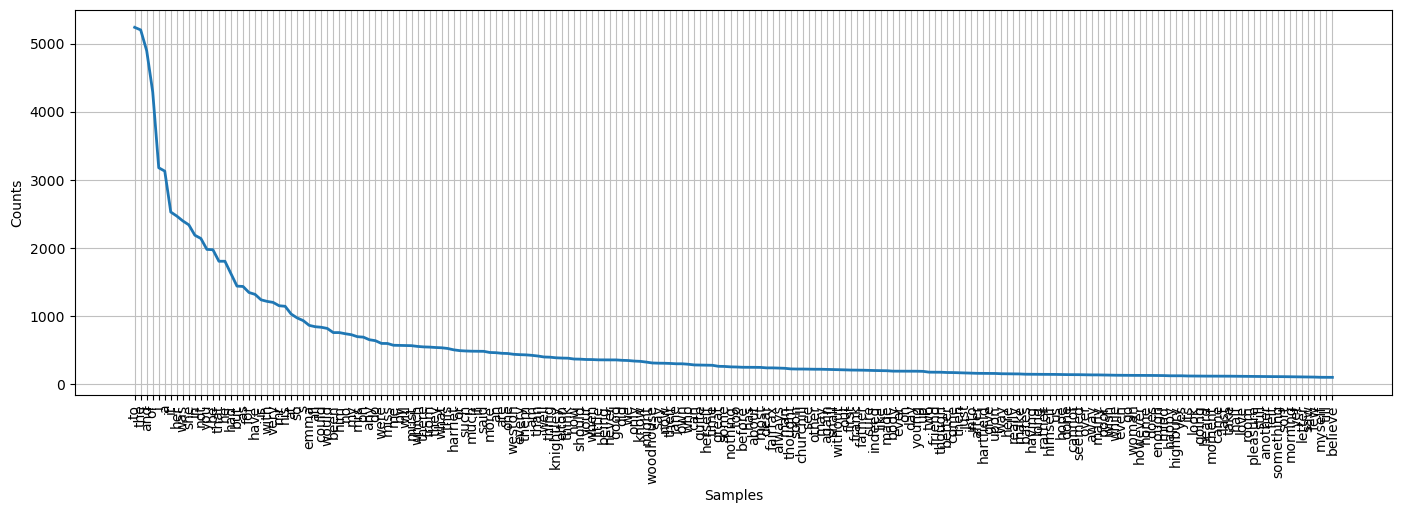

<Axes: xlabel='Samples', ylabel='Counts'>

In [18]:
plt.figure(figsize=(17,5))
fdist.plot(200, )

my_dict = {}
wcount=0
for word, count in fdist.most_common():       
    wcount=wcount+1
    my_dict[word]=count/tw
    if wcount>199:
        break

<BarContainer object of 200 artists>

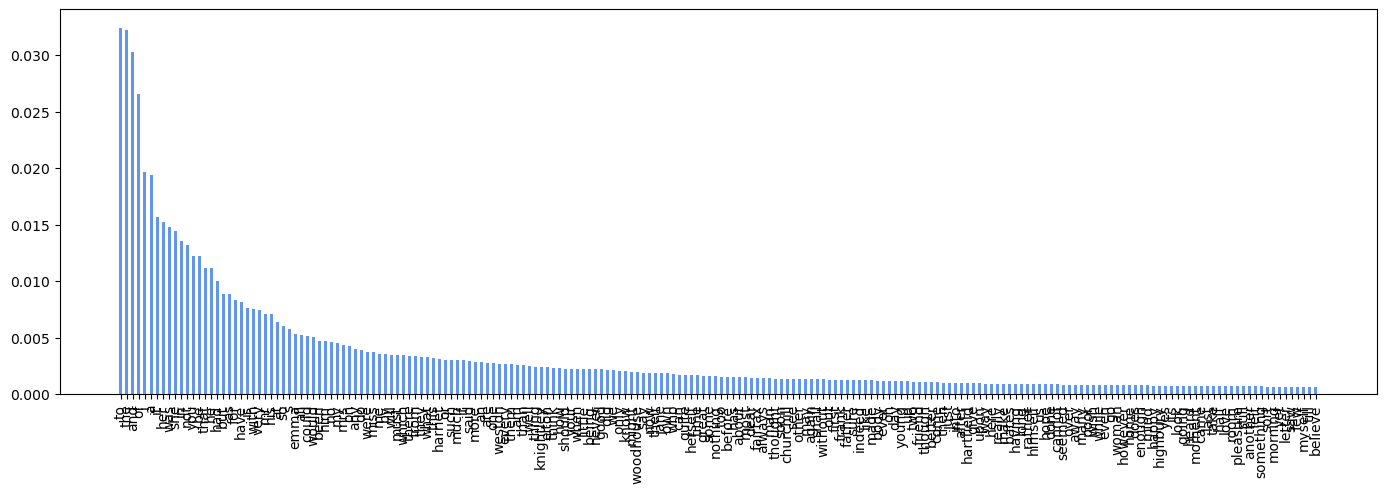

In [20]:
plt.figure(figsize=(17,5))
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=4)
plt.bar(my_dict.keys(), my_dict.values(), width=.5, color='cornflowerblue')

### 6. Zipf's law

Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf’s Law is a statistical distribution in certain data sets, such as words in a linguistic corpus, in which the frequencies of certain words are inversely proportional to their ranks. Named for linguist George Kingsley Zipf, who around 1935 was the first to draw attention to this phenomenon, the law examines the frequency of words in natural language and how the most common word occurs twice as often as the second most frequent word, three times as often as the subsequent word and so on until the least frequent word. The word in the position n appears 1/n times as often as the most frequent one.

https://www.techtarget.com/whatis/definition/Zipfs-Law

We'll examine whether the observed counts of each word match the anticipated counts as per Zipf's Law. Initially, we'll create a function to compute the expected counts. Subsequently, we'll merge this data into a dataframe alongside the actual counts, and calculate the variance and percentage variance for each word.

In [23]:
mostf = fdist.most_common()[0][1]
expected_counts = []
rank = 0
for i in range(len(fdist)):
    rank += 1
    expected_counts.append(round(mostf * (1/rank)))

expected_counts

zipfs_df = pd.DataFrame(fdist.most_common())
zipfs_df.columns=['Word', 'Actual count']
#pd.concat(zipfs_df, axis=1)
zipfs_df["Zipf's Expected Count"] = expected_counts
zipfs_df['Difference'] = zipfs_df['Actual count'] - zipfs_df["Zipf's Expected Count"]
zipfs_df['Percent Difference'] = round(((zipfs_df['Actual count'] / zipfs_df["Zipf's Expected Count"])
                                        - 1) *100).astype(int)
zipfs_df.head(30)

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
0,to,5239,5239,0,0
1,the,5201,2620,2581,99
2,and,4896,1746,3150,180
3,of,4291,1310,2981,228
4,i,3178,1048,2130,203
5,a,3129,873,2256,258
6,it,2528,748,1780,238
7,her,2469,655,1814,277
8,was,2398,582,1816,312
9,she,2340,524,1816,347


We can see in the data above that the actual counts are consistenetly far above the expected counts and by the 13th word the actual counts rise to about 428% above the expected count and remain consistently there for at least the first 30 words. Let's jump to the 500th word to see if the counts are still consistently higher.

At around 500 words into the frequency distribution the actual counts are still around 270% higher than would be expected with Zipf's Law.

In [24]:
zipfs_df[505:515]

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
505,added,37,10,27,270
506,temper,36,10,26,260
507,necessary,36,10,26,260
508,got,36,10,26,260
509,received,36,10,26,260
510,enscombe,36,10,26,260
511,forward,36,10,26,260
512,new,36,10,26,260
513,determined,36,10,26,260
514,meaning,36,10,26,260


At about half way through the frequency distribution the counts are still about 100% higher than would be expected.

In [25]:
zipfs_df[2500:2505]

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
2500,collecting,4,2,2,100
2501,charades,4,2,2,100
2502,intently,4,2,2,100
2503,security,4,2,2,100
2504,addressed,4,2,2,100


Not until the tail of the distribution do the actual and expected counts match.

In [26]:
zipfs_df.tail(5)

,Word,Actual count,Zipf's Expected Count,Difference,Percent Difference
7074,stare,1,1,0,0
7075,deficiencies,1,1,0,0
7076,predictions,1,1,0,0
7077,band,1,1,0,0
7078,finis,1,1,0,0


Let's plot the expected counts and actual counts to visualize the entire distribution.

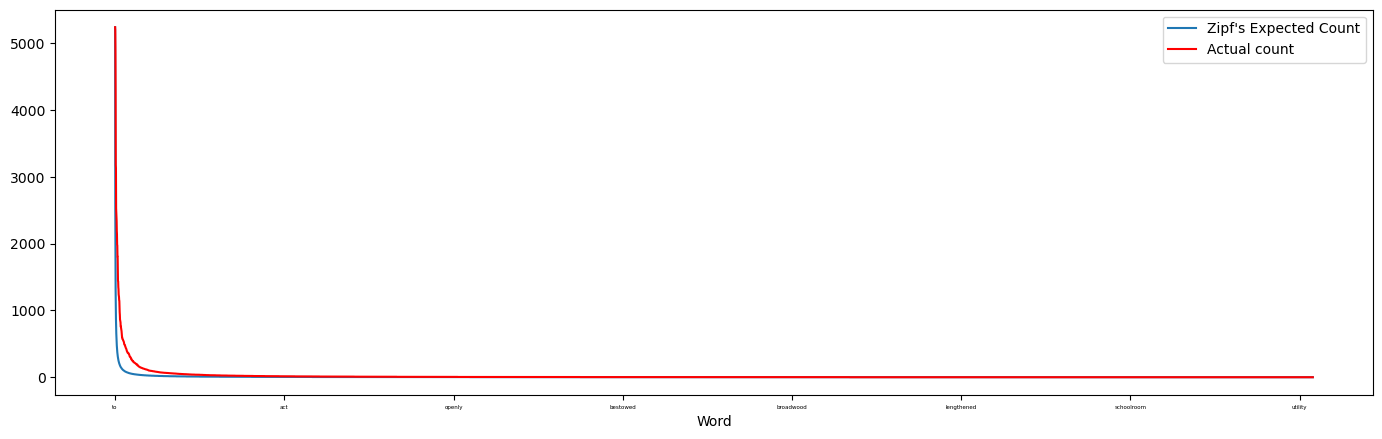

In [28]:
plt.figure(figsize=(17,5))

# gca stands for 'get current axis'
ax = plt.gca()

zipfs_df.plot(kind='line',y="Zipf's Expected Count",x='Word',ax=ax)
zipfs_df.plot(kind='line',y='Actual count',x='Word', color='red', ax=ax)

plt.show()

Examining the plot above, it appears that the relative frequency observed for these words broadly adheres to Zipf’s law, as indicated by the similarity in the plot shapes. However, upon closer inspection of the first 150 words, as depicted in the second plot below, it becomes evident that there are notable discrepancies in the relative frequencies.

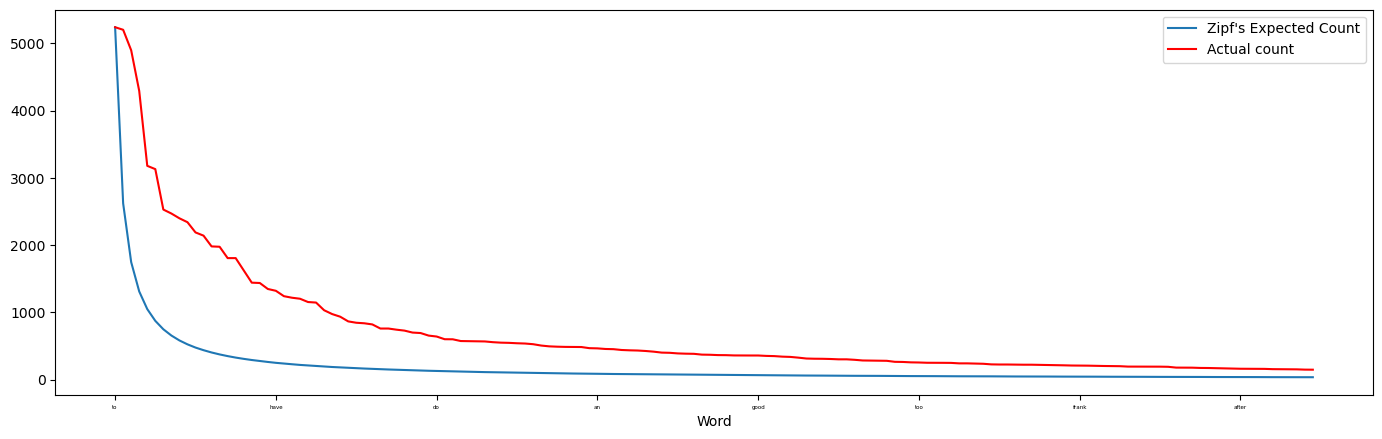

In [29]:
plt.figure(figsize=(17,5))

# gca stands for 'get current axis'
ax = plt.gca()

zipfs_df[:150].plot(kind='line',y="Zipf's Expected Count",x='Word',ax=ax)
zipfs_df[:150].plot(kind='line',y='Actual count',x='Word', color='red', ax=ax)

plt.show()

### 7. Compare with 'all words in all corpora'

How do you perceive the disparities in word frequency within this corpus compared to "all words in all corpora"? For our reference point of "all words in all corpora," we'll utilize Wikipedia's compilation of the 100 most commonly used English words. We'll import the list containing the first 100 most frequently employed English words from Wikipedia.

In [31]:
mc_english_words = pd.read_html('https://en.wikipedia.org/wiki/Most_common_words_in_English#100_most_common_words', 
                 header=0, index_col=None)
mc_english_words = mc_english_words[0]
mc_english_words['Word'] = mc_english_words['Word'].str.lower()
mc_english_words

,Word,Parts of speech,OEC rank,COCA rank[9],Dolch level,Polysemy
0,the,Article,1,1,Pre-primer,12
1,be,Verb,2,2,Primer,21
2,to,Preposition,3,"7, 9",Pre-primer,17
3,of,Preposition,4,4,Grade 1,12
4,and,Coordinator,5,3,Pre-primer,16
...,...,...,...,...,...,...
95,these,Pronoun,96,82,Grade 2,2
96,give,Verb,97,98,Grade 1,19
97,day,Noun,98,90,Dolch list of 95 nouns,9
98,most,Adverb,99,"144, 187",NaN,12


Subsequently, we can construct a dataframe comprising solely the first 100 most commonly utilized words in the Jane Austen text, facilitating a comparison between the two lists. The Wikipedia list is already furnished with a rank in the OEC rank column, and we can leverage the index incremented by one to generate a rank column for the Jane Austen data.

In [32]:
austen_100 = pd.DataFrame(fdist.most_common()[:100], columns=['Austen_Word', 'Austen_Frequency'])
austen_100['Austen_Rank'] = austen_100.index +1
austen_100


,Austen_Word,Austen_Frequency,Austen_Rank
0,to,5239,1
1,the,5201,2
2,and,4896,3
3,of,4291,4
4,i,3178,5
...,...,...,...
95,herself,279,96
96,time,279,97
97,great,264,98
98,some,262,99


In [33]:
pd.set_option('display.max_rows', 500)
words_merged = pd.merge(austen_100,mc_english_words,left_on='Austen_Word',right_on='Word',how='outer')
top_100 = words_merged.fillna('')
top_100

,Austen_Word,Austen_Frequency,Austen_Rank,Word,Parts of speech,OEC rank,COCA rank[9],Dolch level,Polysemy
0,to,5239.0,1.0,to,Preposition,3,"7, 9",Pre-primer,17.0
1,the,5201.0,2.0,the,Article,1,1,Pre-primer,12.0
2,and,4896.0,3.0,and,Coordinator,5,3,Pre-primer,16.0
3,of,4291.0,4.0,of,Preposition,4,4,Grade 1,12.0
4,i,3178.0,5.0,i,Pronoun,10,11,Pre-primer,7.0
5,a,3129.0,6.0,a,Article,6,5,Pre-primer,20.0
6,it,2528.0,7.0,it,Pronoun,11,10,Pre-primer,18.0
7,her,2469.0,8.0,her,Possessive pronoun,"29, 106",42,Grade 1,3.0
8,was,2398.0,9.0,,,,,,
9,she,2340.0,10.0,she,Pronoun,30,31,Primer,7.0


In [34]:
len(top_100)

137

## Words that are in both the Austen 100 most frequently used words and the Wikipedia top 100 most frequently used English words list

In [35]:
matched_words = words_merged[['Austen_Word','Austen_Rank','Word','OEC rank']].dropna()
matched_words['Austen_Rank'] = matched_words['Austen_Rank'].astype(int)
matched_words.reset_index(inplace=True)
matched_words

,index,Austen_Word,Austen_Rank,Word,OEC rank
0,0,to,1,to,3
1,1,the,2,the,1
2,2,and,3,and,5
3,3,of,4,of,4
4,4,i,5,i,10
5,5,a,6,a,6
6,6,it,7,it,11
7,7,her,8,her,"29, 106"
8,9,she,10,she,30
9,10,in,11,in,7


In [36]:
len(matched_words)

63

63 of the words most frequently used in the Austen text also appear in the top 100 most frequently used words in the English language. This is not suprising since the list includes many words that are not necessarily meaningful to the story, but are words like, 'the', 'and', 'to', 'of', 'a', and 'in'.

### Words in either the Austen 100 most frequently used words or the Wikipedia top 100 most frequently used English words list but not both

In [37]:
unmatched_words = top_100[['Austen_Word','Austen_Rank','Word','OEC rank']]
unmatched_words = unmatched_words[(unmatched_words['Austen_Word']=='') | (unmatched_words['Word']=='')]
unmatched_words.reset_index(inplace=True)
unmatched_words

,index,Austen_Word,Austen_Rank,Word,OEC rank
0,8,was,9.0,,
1,16,had,17.0,,
2,21,is,22.0,,
3,23,very,24.0,,
4,24,mr,25.0,,
5,28,s,29.0,,
6,29,emma,30.0,,
7,33,been,34.0,,
8,37,mrs,38.0,,
9,41,were,42.0,,
